In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import multivariate_normal

In [46]:
intercept = -0.3
slope = 0.5
mu = 0
sigma = 0.2

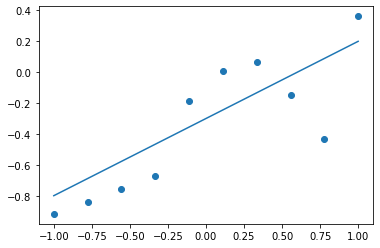

In [52]:
x_noise = np.linspace(-1, 1, 10)
y = []
for i in x_noise:
    y.append(slope*i + intercept + np.random.normal(mu, sigma))

plt.scatter(x_noise, y)
plt.plot(x_noise, slope*x_n + intercept)
plt.show()

In [53]:
def likelihoodFun(x, y, w0, w1):
    k = np.sqrt(2*np.pi) * sigma
    return k * np.exp(-0.5 * ((y - (w0 + w1*x))/sigma)**2)

def posteriorFun(s0, m0, phi, beta, t):
    s0Inv = np.linalg.inv(s0)
    Sn = np.linalg.inv(s0Inv + beta * phi.T @ phi)
    inner_term = s0Inv @ (m0.reshape((2, 1))) + beta * phi.T * t
    Mn = Sn @ inner_term
    return Mn.reshape((1, 2))[0], Sn

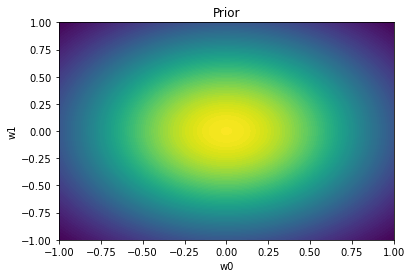

In [54]:
w0, w1 = np.meshgrid(np.linspace(-1, 1, 1000), np.linspace(-1, 1, 1000))
prior = multivariate_normal([0, 0], [[slope, 0], [0, slope]])
prior = prior.pdf(np.dstack((w0, w1)))
plt.contourf(w0, w1, prior, 100)
plt.title('Prior')
plt.xlabel('w0')
plt.ylabel('w1')
plt.show()

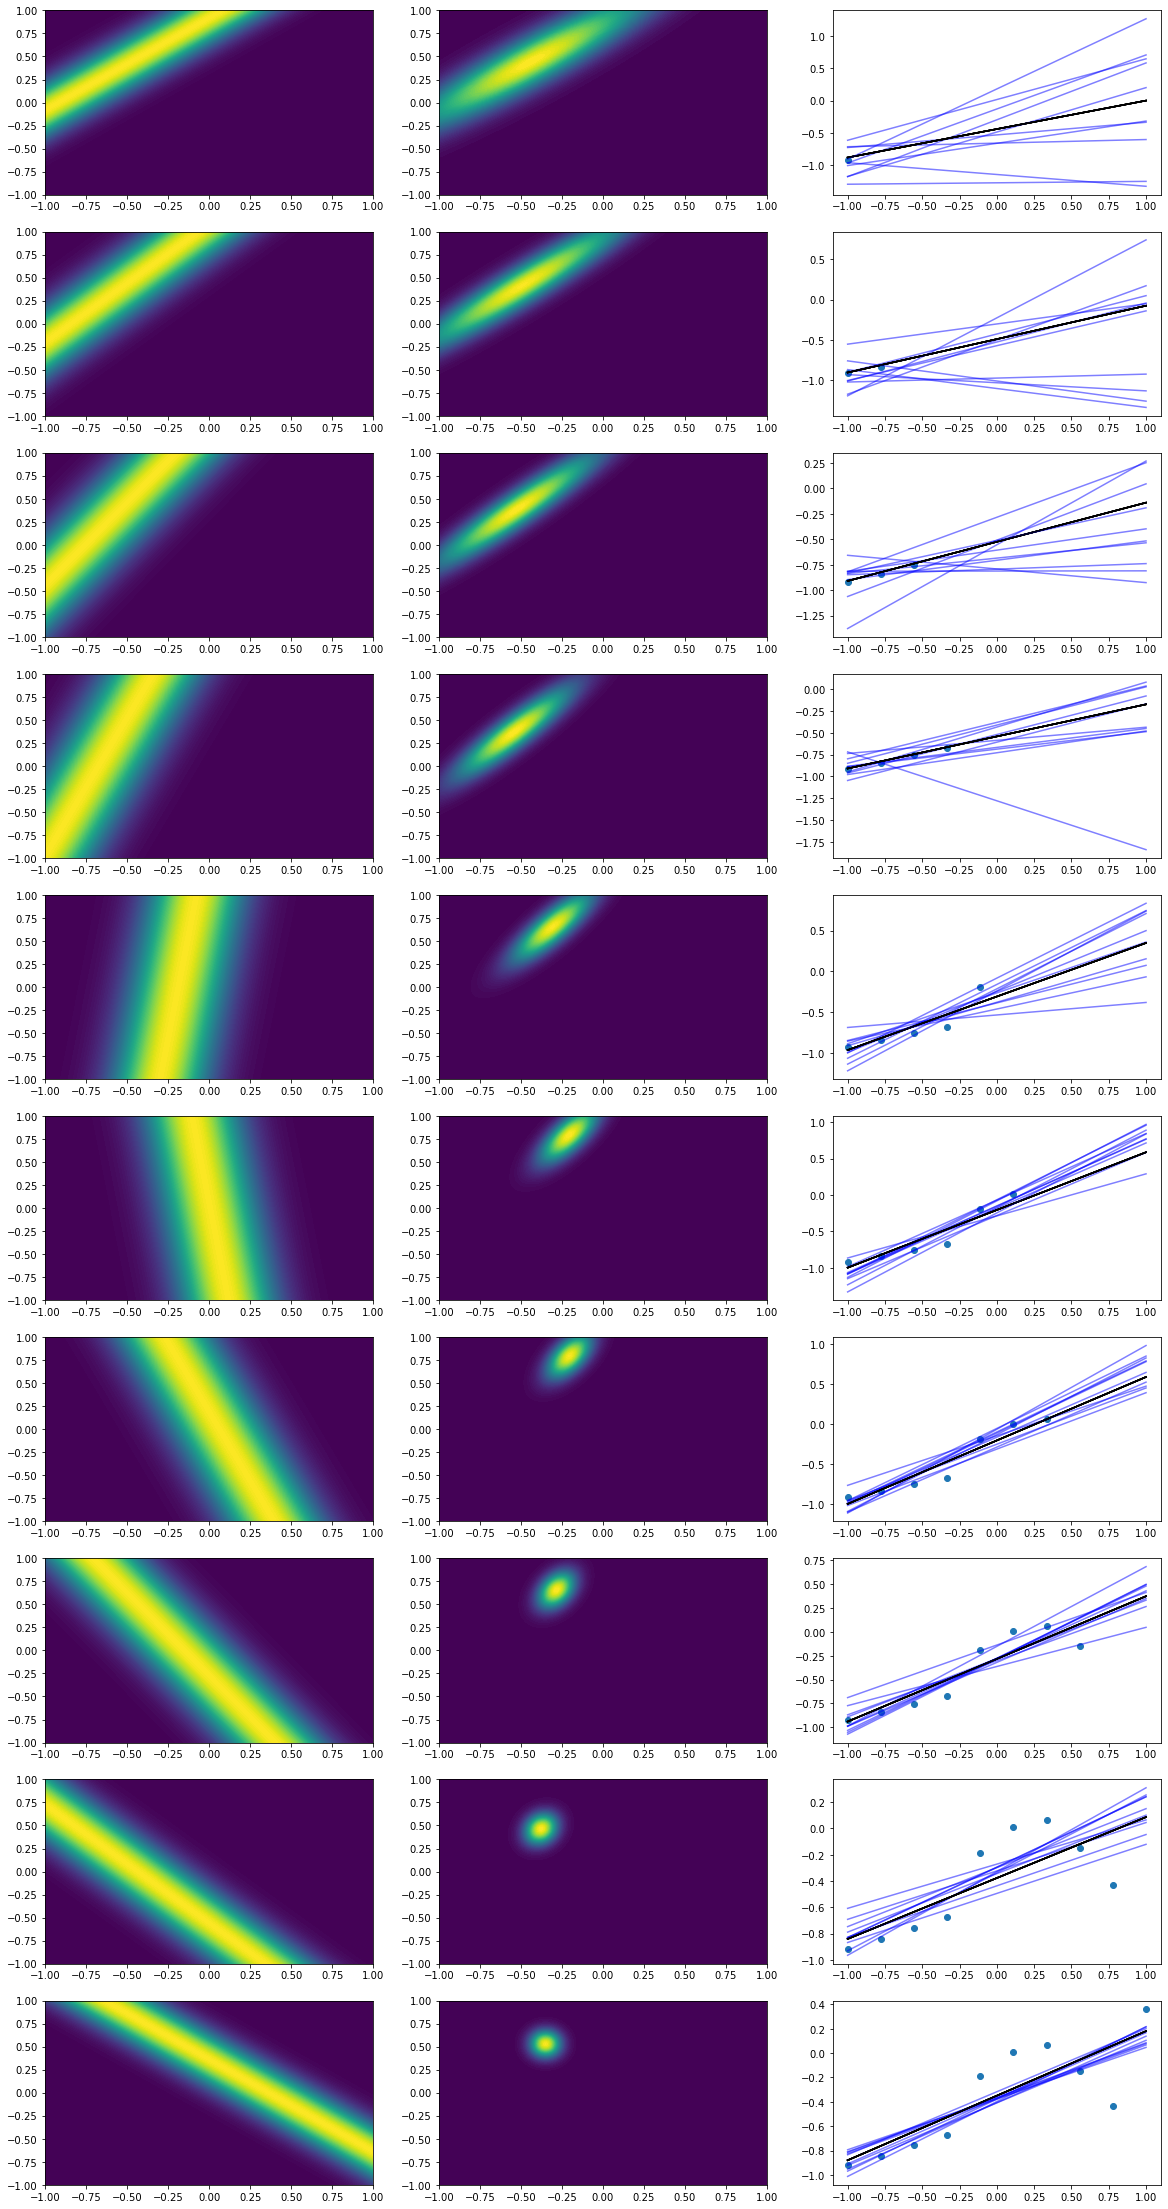

In [56]:
axis = 0
beta = 25
m0, s0 = np.array([0, 0]), np.array([[slope, 0], [0, slope]])
fig, axs = plt.subplots(10, 3, figsize=(20, 40))

X = []
Y = []
for i, j in zip(x_noise, y):
    mle = likelihoodFun(i, j, w0, w1)
    posterior = prior * mle
    prior = posterior
    phi = np.array([1, i]).reshape((1, 2))
    m0, s0 = posteriorFun(s0, m0, phi, beta, j)
    distribution = multivariate_normal.rvs(m0, s0, 10)
    X.append(i)
    Y.append(j)
    axs[axis, 0].contourf(w0, w1, mle, 100)
    axs[axis, 1].contourf(w0, w1, posterior, 100)
    for k in distribution:
        axs[axis, 2].plot(x_noise, k[0] + k[1] * x_noise, color='blue', alpha=0.5)
        axs[axis, 2].plot(x_noise, m0[0] + m0[1] * x_noise, color='black', alpha=0.7)
    axs[axis, 2].scatter(X, Y)
    axis += 1
plt.show()